In [1]:
%%time
##############################
##          IMPORTS         ##
##############################
# THIRD PARTY IMPORTS
# For arrays
import numpy as np
# For importing files from other directories
import sys

# Directories to find data files and save images
data_dir = 'raw_data/'
images_dir = 'img/'

# LOCAL IMPORTS
# Local imports stored in this folder
sys.path.append('support_code/')
# For graphing functionality and error functions
from Analysis import *
# To generates the data file paths
from DataImportAndFormat import *
# To perform the bayesian extrapolation
from BayesianExtrapolation import *
from Regression import *

CPU times: user 1.88 s, sys: 1.03 s, total: 2.91 s
Wall time: 873 ms


In [2]:
%%time
# The folders where the data is contained
folders = ["rs_0_05/", "rs_0_1/", "rs_0_25/", "rs_0_5/", "rs_0_75/"]
# Save the number of neutrons after each run
numbers = []
# Collecte the predicted and true converged CCD correlation energies along
# with the uncertianities
data_collected = []
std_collected = []
# Perform the Gaussian process extrapolation on every data set and save the results
for folder in folders:
  sep = " "
  filenames, numbers = generate_filenames (data_dir + folder)
  data, std, errs = bayesian_ridge_regression_extrapolation (numbers, filenames, seq=2,\
                            start_dim=5,dim=21, isDisplay=False, isOld=False, sep=sep)
  data_collected.append(data)
  std_collected.append(std)
# Split the predictions from the true data and divide by N
predictions_collected = []
true_collected = []
numbers = np.asarray(numbers)
for data in data_collected:
    data = np.asarray(data)
    predictions_collected.append(data[:,1]/numbers)
    true_collected.append(data[:,0]/numbers)
# Divide the uncertainity by N as well
std_collected = [i/numbers for i in std_collected]

CPU times: user 3.11 s, sys: 10.1 ms, total: 3.12 s
Wall time: 3.12 s


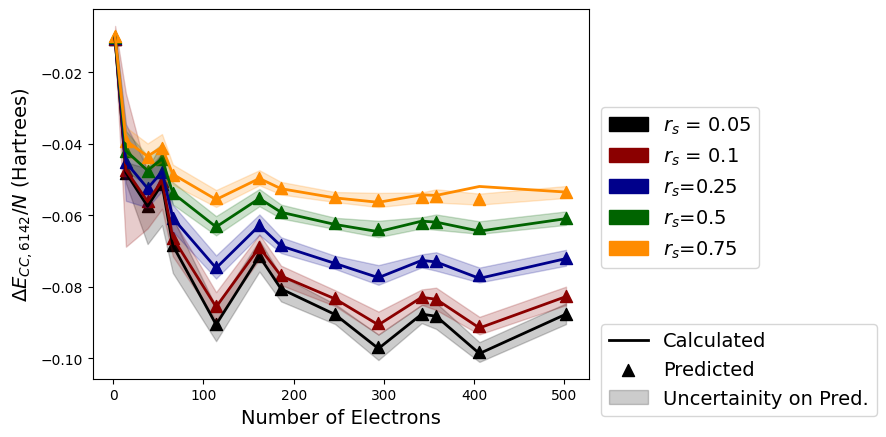

CPU times: user 1.51 s, sys: 1.25 s, total: 2.76 s
Wall time: 579 ms


In [3]:
%%time
# Define the colors for the graphing and the data set labels
colors = ["black", "darkred", "darkblue", "darkgreen",  "darkorange"]
labels = [r"$r_s$ = 0.05",r"$r_s$ = 0.1",r"$r_s$=0.25",r"$r_s$=0.5",r"$r_s$=0.75"]
# Save the images here
savename = images_dir+"Figure2.pdf"
# Graph all of the true data and all of the predicted data with its uncertainities
va = VisualAnalysis()
numbers = np.asarray(numbers)
va.graph_model_outputs_with_uncertainities_many (numbers, true_collected, predictions_collected,\
                                                 std_collected, "Number of Electrons",\
                                                 r"$\Delta E_{CC,6142}/N$ (Hartrees)", colors, labels,\
                                                 savename, isDisplay=True)

In [4]:
%%time
# Calculate the RMSE error per density
ea = ErrorAnalysis()
densities = [0.05, 0.1, 0.25, 0.5, 0.75]
for i in range(5):
    print("Density:", densities[i], "\t RMSE:", np.format_float_positional(ea.rmse(predictions_collected[i],\
                true_collected[i]),precision=3, unique=False, fractional=False, trim='k'),\
                "\t Percent Error:", np.format_float_positional(ea.percent_error(predictions_collected[i],\
                true_collected[i]),precision=3, unique=False, fractional=False, trim='k'))
    print()

Density: 0.05 	 RMSE: 0.000159 	 Percent Error: 0.116

Density: 0.1 	 RMSE: 0.000249 	 Percent Error: 0.193

Density: 0.25 	 RMSE: 0.000357 	 Percent Error: 0.329

Density: 0.5 	 RMSE: 0.000388 	 Percent Error: 0.437

Density: 0.75 	 RMSE: 0.000993 	 Percent Error: 0.880

CPU times: user 4.41 ms, sys: 24 µs, total: 4.44 ms
Wall time: 223 µs


In [5]:
%%time
# And calculate the total RMSE error
print("Average RMSE:", np.format_float_positional(ea.rmse(predictions_collected, true_collected), \
                        precision=3, unique=False, fractional=False, trim='k'))
print("Average Percent Error:",np.format_float_positional(ea.percent_error(predictions_collected,\
                        true_collected),precision=3, unique=False, fractional=False, trim='k'))


Average RMSE: 0.000520
Average Percent Error: 0.391
CPU times: user 1.22 ms, sys: 231 µs, total: 1.45 ms
Wall time: 228 µs


In [6]:
%%time
for i in range(5):
    print("Density:", densities[i], "\t AVERAGE STD:", np.format_float_positional(np.average(std_collected[i]),\
            precision=3, unique=False, fractional=False, trim='k'))

Density: 0.05 	 AVERAGE STD: -0.00459
Density: 0.1 	 AVERAGE STD: -0.00510
Density: 0.25 	 AVERAGE STD: -0.00348
Density: 0.5 	 AVERAGE STD: -0.00263
Density: 0.75 	 AVERAGE STD: -0.00224
CPU times: user 998 µs, sys: 18 µs, total: 1.02 ms
Wall time: 112 µs
